In [1]:
import sys
sys.path.append('../src')

In [2]:
import os
import unittest
import numpy as np
import pandas as pd

from features.indicators import sma_crossover, macd_calculation, macd_histogram_crossover, create_bol_bands, bol_bands_lower_band_bounce
from environments.tick_data import TickData


/tmp/ipykernel_1121852/537171958.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
        data = pd.read_csv('../tests/test_data/btc.csv')

        tick = TickData(open=62589, high=62597, low=62550, close=62557)
        history = [
            TickData(row['Close'], row['Open'], row['High'], row['Low'])
            for _, row in data.iterrows()
        ]


In [4]:
data

,Open,High,Low,Close,Adj Close,Volume
0,61667.996094,61868.320312,61655.273438,61812.628906,61812.628906,0
1,61744.515625,62416.003906,61744.515625,62416.003906,62416.003906,557475840
2,62280.769531,62411.539062,62135.460938,62244.480469,62244.480469,602599424
3,62257.394531,62898.460938,62183.136719,62881.378906,62881.378906,0
4,62909.308594,62945.738281,62736.253906,62884.656250,62884.656250,0
...,...,...,...,...,...,...
116,67401.718750,67758.984375,67341.671875,67702.312500,67702.312500,1114148864
117,67670.828125,68333.820312,67606.421875,68030.046875,68030.046875,2120896512
118,67889.304688,67999.882812,67732.062500,67822.085938,67822.085938,798789632
119,67827.835938,67938.195312,67196.914062,67401.390625,67401.390625,0


In [5]:
        parameters = {
            'period': 10,
            'sd': 2
        }

In [6]:
high,middle,low = create_bol_bands(history, parameters)

In [7]:
high_df = pd.DataFrame(high)

In [8]:
high_df

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
116,67636.013865
117,67929.269902
118,68054.553033
119,68065.302961


In [9]:
low_df = pd.DataFrame(low)

In [10]:
middle_df=pd.DataFrame(middle)

In [11]:
        parameters = {
            'period': 10,
            'sd': 2,
            'candle_bounce_number': 3,
            'bounce_trigger': .25

        }

sap = bol_bands_lower_band_bounce(history, parameters)

In [12]:
sap

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])

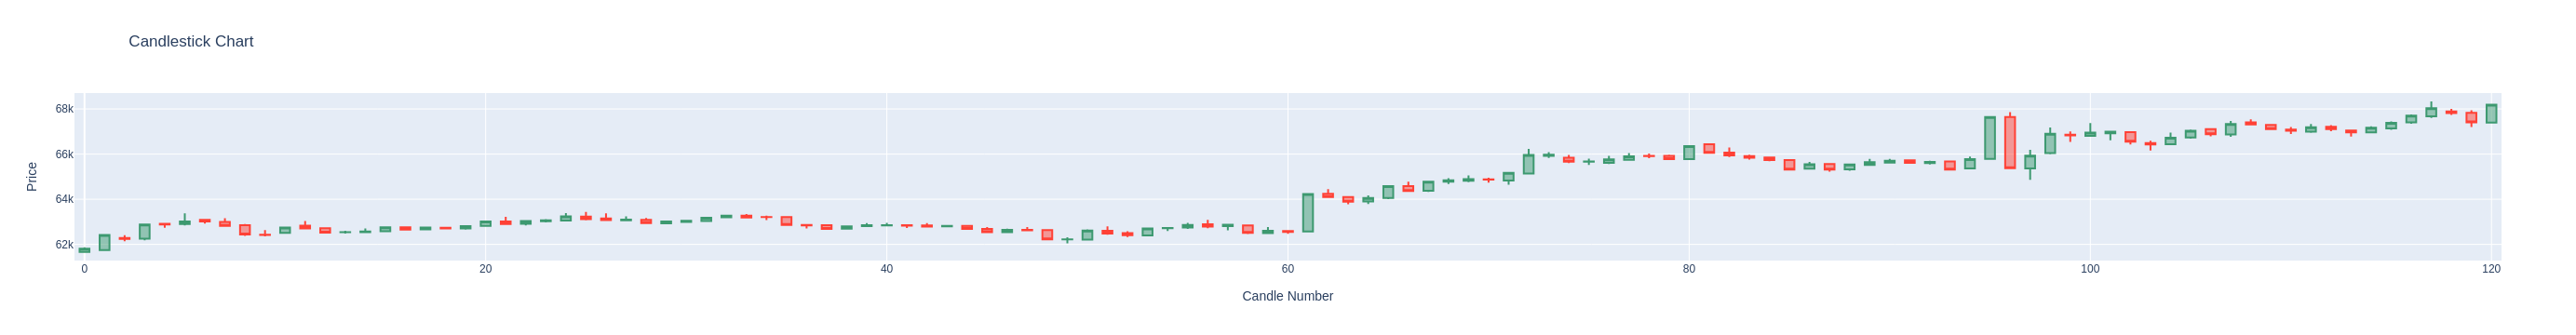

In [21]:
# Basic candlestick graph

fig = go.Figure(data=[go.Candlestick(x=data.index,
                open=data['Open'],
                high=data['High'],
                low=data['Low'],
                close=data['Close'],
                name='Candlesticks')])


# Update the layout
fig.update_layout(
    title='Candlestick Chart',
    yaxis_title='Price',
    xaxis_title='Candle Number',
    xaxis_rangeslider_visible=False,
    legend_title_text='Legend',
    )

# Show the plot
fig.show()

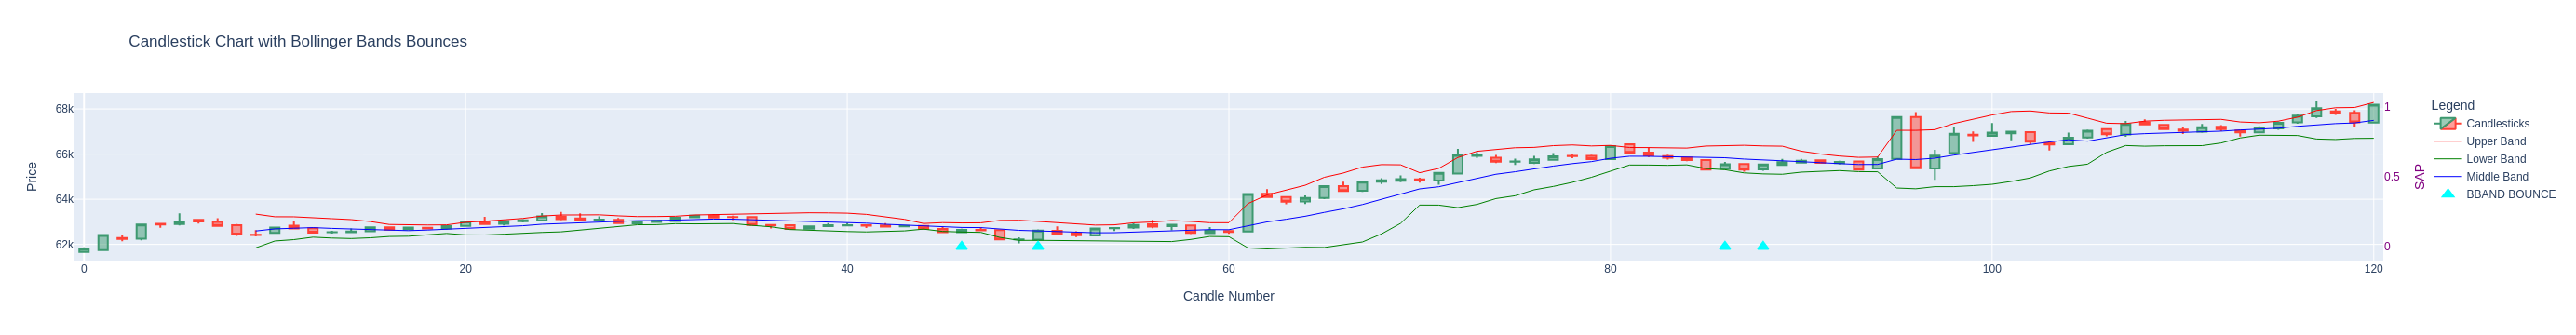

In [22]:
import plotly.graph_objects as go
import numpy as np
# Ensure sap is a numpy array
sap = np.array(sap)

# Create the candlestick chart
fig = go.Figure(data=[go.Candlestick(x=data.index,
                open=data['Open'],
                high=data['High'],
                low=data['Low'],
                close=data['Close'],
                name='Candlesticks')])

fig.add_trace(go.Scatter(x=high_df.index, y=high_df[0], mode='lines', name='Upper Band',
                         line=dict(color='red', width=1)))
fig.add_trace(go.Scatter(x=low_df.index, y=low_df[0], mode='lines', name='Lower Band',
                         line=dict(color='green', width=1)))
fig.add_trace(go.Scatter(x=middle_df.index, y=middle_df[0], mode='lines', name='Middle Band',
                         line=dict(color='blue', width=1)))

sap_indices = np.where(sap == 1)[0]

fig.add_trace(go.Scatter(
    x=sap_indices,
    y=[0] * len(sap_indices), 
    mode='markers',
    name='BBAND BOUNCE',
    marker=dict(
        symbol='triangle-up',
        size=10,
        color='cyan',
        line=dict(width=2, color='cyan')
    ),
    yaxis='y2'  # Use secondary y-axis
))

# Update the layout
fig.update_layout(
    title='Candlestick Chart with Bollinger Bands Bounces',
    yaxis_title='Price',
    xaxis_title='Candle Number',
    xaxis_rangeslider_visible=False,
    legend_title_text='Legend',
    yaxis2=dict(
        title='SAP',
        titlefont=dict(color='purple'),
        tickfont=dict(color='purple'),
        overlaying='y',
        side='right',
        range=[-0.1, 1.1],  # Set range for SAP axis
        showgrid=False,
        zeroline=False,
    )
)


first_valid_indices = [
    data['Close'].first_valid_index(),
    high_df[0].first_valid_index(),
    low_df[0].first_valid_index(),
    middle_df[0].first_valid_index()
]
first_valid_index = min(index for index in first_valid_indices if index is not None)

if first_valid_index:
    fig.update_xaxes(range=[first_valid_index, data.index[-1]])

# Show the plot
fig.show()

In [15]:
627506-625495

2011

In [16]:
2011*.25

502.75

In [17]:
502.75+625495

625997.75

In [ ]:
626448